In [63]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline


from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K


In [64]:
# import dataset
from keras.datasets import mnist


# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()



# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))



# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


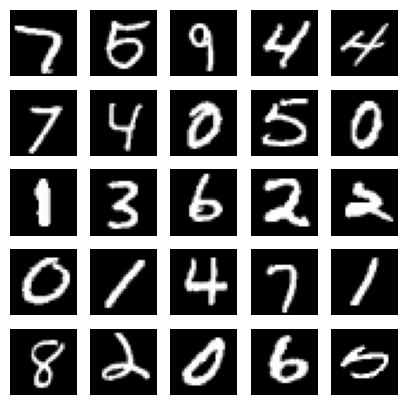

In [65]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

In [5]:
y_train.shape

(60000,)

In [6]:
# compute the number of labels
num_labels = len(np.unique(y_train))
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [9]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [10]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

In [11]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.7683 - loss: 0.7271
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9391 - loss: 0.2023
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9537 - loss: 0.1550
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9610 - loss: 0.1337
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9645 - loss: 0.1134
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9692 - loss: 0.1057
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9720 - loss: 0.0915
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9747 - loss: 0.0840
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9746 - loss: 0.0786
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9767 - loss: 0.0758
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9771 - loss: 0.0723
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms

In [14]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9775 - loss: 0.0826

Test accuracy: 98.2%


In [15]:
model.save("mnist_epch_20.keras")

In [ ]:
model = keras.models.load_model('/content/mnist_epch_20.keras')

(-0.5, 27.5, 27.5, -0.5)

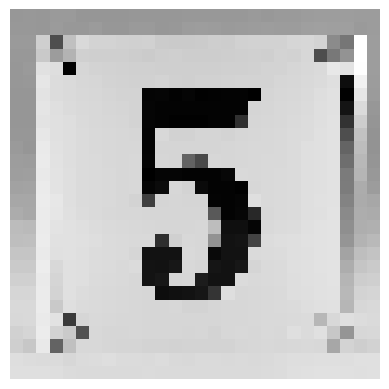

In [79]:
import cv2

img = cv2.imread("/content/test.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = cv2.resize(img, (image_size, image_size))
plt.imshow(img, 'gray')
plt.axis('off')

In [73]:
img.shape

(28, 28)

In [74]:
x_train[0].shape

(28, 28)

In [75]:
img = np.reshape(img, [-1, input_size])

In [76]:
result = model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [77]:
np.argmax(result)

5